## What is System Marginal Price(SMP)?
System Marginal Price is calculated by taking into account the point of net instruction volume by starting from the lowest price of up regulation offer if there is energy deficit in system or the highest price of down regulation bid if there is energy surplus in the system.

## What kinds of things affect SMP(guessing)?
- price fuel to generate(coal, oil, gas, etc)
- weather
    - temperature
    - humidity
    - rain
    - wind
- etc.....

### Check the percentage of way of generation
![](img/percentage_of_gernorator.jpg)

## What should we do??
- define a problem: Predict the Max, Min, Avg of SMP!
- data cleansing
- visualize the data
- select features

In [1]:
import numpy as np
import pandas as pd

#Visualization
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Data import 
hourly_smp = pd.read_csv("data/hourly_smp_v1.csv")
weather = pd.read_csv("data/weather_v1.csv")
lookupTable = pd.read_csv("data/lookupTable_area.csv")
target = pd.read_csv("data/target_v1.csv")

C:\Users\lonj7\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Cleasing
- hourly_smp
- weather

In [3]:
import datetime 

In [4]:
# hourly_smp group by date making sum, avg, max, min
hourly_smp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  17520 non-null  object 
 1   smp       17520 non-null  float64
dtypes: float64(1), object(1)
memory usage: 273.9+ KB


In [5]:
# datetime has error with 24:00. So, we need to replace it to 00:00
hourly_smp['datetime'] = hourly_smp['datetime'].str.replace('24:00', '0:00')

hourly_smp['datetime'] = pd.to_datetime(hourly_smp['datetime'])
hourly_smp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  17520 non-null  datetime64[ns]
 1   smp       17520 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 273.9 KB


In [6]:
hourly_smp.resample('d', on='datetime').agg(['mean', 'max', 'min', 'sum']).head()

smp                         
                  mean     max     min      sum
datetime                                       
2018-02-01  131.902083  150.65  116.84  3165.65
2018-02-02  133.380833  163.86  116.84  3201.14
2018-02-03  130.352917  164.07  116.85  3128.47
2018-02-04  131.085417  171.00  115.76  3146.05
2018-02-05  137.207083  170.34  123.89  3292.97

In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648852 entries, 0 to 648851
Data columns (total 37 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   area            648852 non-null  int64  
 1   datetime        648852 non-null  object 
 2   temp            645507 non-null  float64
 3   temp_QCFlag     27743 non-null   float64
 4   prec            581414 non-null  float64
 5   prec_QCFlag     17055 non-null   float64
 6   ws              640517 non-null  float64
 7   ws_QCFlag       26387 non-null   float64
 8   wd              639565 non-null  float64
 9   wd_QCFlag       26456 non-null   float64
 10  humid           586245 non-null  float64
 11  humid_QCFlag    27393 non-null   float64
 12  vaporP          70026 non-null   float64
 13  dew             70026 non-null   float64
 14  landP           300870 non-null  float64
 15  landP_QCFlag    27398 non-null   float64
 16  seaP            300848 non-null  float64
 17  seaP_QCFla

In [8]:
weather.head()

,area,datetime,temp,temp_QCFlag,prec,prec_QCFlag,ws,ws_QCFlag,wd,wd_QCFlag,...,vis,sfctype,weathernumber,sfctemp,sfctemp_QCFlag,landtemp_5cm,landtemp_10cm,landtemp_20cm,landtemp_30cm,station
0,184,2018-02-01 01:00,4.7,0.0,NaN,NaN,3.6,0.0,20.0,0.0,...,1950.0,NaN,NaN,2.9,0.0,3.7,3.9,4.2,4.9,ASOS
1,184,2018-02-01 02:00,4.8,0.0,NaN,NaN,2.6,0.0,360.0,0.0,...,1865.0,NaN,NaN,2.9,0.0,3.6,3.8,4.2,4.9,ASOS
2,184,2018-02-01 03:00,4.8,0.0,NaN,NaN,4.6,0.0,20.0,0.0,...,1855.0,NaN,NaN,3.0,0.0,3.6,3.8,4.3,4.9,ASOS
3,184,2018-02-01 04:00,4.5,0.0,NaN,NaN,5.7,0.0,20.0,0.0,...,1425.0,NaN,NaN,3.0,0.0,3.6,3.8,4.2,5.0,ASOS
4,184,2018-02-01 05:00,4.5,0.0,NaN,9.0,4.4,0.0,20.0,0.0,...,1043.0,NaN,1.0,3.0,0.0,3.5,3.8,4.2,4.9,ASOS


In [9]:
# chage datetime(object) featrue to datetime
weather['datetime'] = pd.to_datetime(weather['datetime'])
weather.head()

,area,datetime,temp,temp_QCFlag,prec,prec_QCFlag,ws,ws_QCFlag,wd,wd_QCFlag,...,vis,sfctype,weathernumber,sfctemp,sfctemp_QCFlag,landtemp_5cm,landtemp_10cm,landtemp_20cm,landtemp_30cm,station
0,184,2018-02-01 01:00:00,4.7,0.0,NaN,NaN,3.6,0.0,20.0,0.0,...,1950.0,NaN,NaN,2.9,0.0,3.7,3.9,4.2,4.9,ASOS
1,184,2018-02-01 02:00:00,4.8,0.0,NaN,NaN,2.6,0.0,360.0,0.0,...,1865.0,NaN,NaN,2.9,0.0,3.6,3.8,4.2,4.9,ASOS
2,184,2018-02-01 03:00:00,4.8,0.0,NaN,NaN,4.6,0.0,20.0,0.0,...,1855.0,NaN,NaN,3.0,0.0,3.6,3.8,4.3,4.9,ASOS
3,184,2018-02-01 04:00:00,4.5,0.0,NaN,NaN,5.7,0.0,20.0,0.0,...,1425.0,NaN,NaN,3.0,0.0,3.6,3.8,4.2,5.0,ASOS
4,184,2018-02-01 05:00:00,4.5,0.0,NaN,9.0,4.4,0.0,20.0,0.0,...,1043.0,NaN,1.0,3.0,0.0,3.5,3.8,4.2,4.9,ASOS


area: 지점코드 (지점 코드별 지점명은 lookupTable_area.csv 참조) \
datetime: 일시 (YYYY-MM-DD hh:mm)\
temp: 기온 (°C)\
temp_QCFlag: 기온 QC플래그\
prec: 강수량 (mm)\
prec_QCFlag: 강수량 QC플래그\
ws: 풍속 (m/s)\
ws_QCFlag: 풍속 QC플래그\
wd: 풍향 (16방위)\
wd_QCFlag: 풍향 QC플래그\
humid: 습도 (%)\
humid_QCFlag: 습도 QC플래그\
vaprP: 증기압 (hPa)\
dew: 이슬점온도 (°C)\
landP: 현지기압 (hPa)\
landP_QCFlag: 현지기압 QC플래그\
seaP: 해면기압 (hPa)\
seP_QCFlag: 해면기압 QC플래그\
suntime: 일조 (hr)\
suntime_QCFlag: 일조 QC플래그\
rad: 일사 (MJ/m2)\
snow: 적설 (cm)\
3hr_snow: 3시간신적설 (cm)\
C: 전운량 (10분위)\
lowmiddleC: 중하층운량 (10분위)\
typeC: 운형 (운형약어)\
ceiling: 최저운고 (100m)\
vis: 시정 (10m)\
sfctype: 지면상태 (지면상태코드)\
weathernumber: 현상번호 (국내식)\
sfctemp: 지면온도 (°C)\
sfctemp_QCFlag: 지면온도 QC플래그\
landtemp_5 10 20 30cm: $x$cm 지중온도 (°C)\
station: 관측장비 (ASOS 또는 AWS)

Q: What is QCFlag? : http://www.nifs.go.kr/kodc/risa_qc_information.kodc \
just drop every someting-QCFlag feature...\
drop sfctemp, typeC, ceiling, lowmiddleC, vis, sfctype, seaP, wd

Q: What is weathernumber"? : 

If "prec" > 0, new featrue, isRain, will 1. If prec==0, then 0.

if "snow" > 0, new feature, isSnow feature, will be 1.

In [10]:
# drop QCFlag
weather.drop(['temp_QCFlag', 'prec_QCFlag', 'ws_QCFlag', 
              'wd_QCFlag', 'humid_QCFlag', 'landP_QCFlag', 
              'seaP_QCFlag', 'suntime_QCFlag', 'sfctemp_QCFlag'],
             axis = 1, inplace=True)
weather.head()

,area,datetime,temp,prec,ws,wd,humid,vaporP,dew,landP,...,ceiling,vis,sfctype,weathernumber,sfctemp,landtemp_5cm,landtemp_10cm,landtemp_20cm,landtemp_30cm,station
0,184,2018-02-01 01:00:00,4.7,NaN,3.6,20.0,58.0,5.0,-2.8,1024.4,...,12.0,1950.0,NaN,NaN,2.9,3.7,3.9,4.2,4.9,ASOS
1,184,2018-02-01 02:00:00,4.8,NaN,2.6,360.0,57.0,4.9,-3.0,1024.3,...,NaN,1865.0,NaN,NaN,2.9,3.6,3.8,4.2,4.9,ASOS
2,184,2018-02-01 03:00:00,4.8,NaN,4.6,20.0,62.0,5.4,-1.8,1024.1,...,11.0,1855.0,NaN,NaN,3.0,3.6,3.8,4.3,4.9,ASOS
3,184,2018-02-01 04:00:00,4.5,NaN,5.7,20.0,62.0,5.2,-2.1,1023.8,...,9.0,1425.0,NaN,NaN,3.0,3.6,3.8,4.2,5.0,ASOS
4,184,2018-02-01 05:00:00,4.5,NaN,4.4,20.0,62.0,5.2,-2.1,1023.8,...,10.0,1043.0,NaN,1.0,3.0,3.5,3.8,4.2,4.9,ASOS


In [11]:
# drop others

weather.drop(['area', 'sfctype', 'weathernumber', 'sfctemp',
              'landtemp_5cm', 'landtemp_10cm', 'landtemp_20cm', 'landtemp_30cm',
              'typeC', 'ceiling', 'lowmiddleC', 'vis', 'seaP', 'wd', '3hr_snow'],
             axis = 1, inplace=True)
weather.head()

,datetime,temp,prec,ws,humid,vaporP,dew,landP,suntime,rad,snow,C,station
0,2018-02-01 01:00:00,4.7,NaN,3.6,58.0,5.0,-2.8,1024.4,NaN,NaN,NaN,NaN,ASOS
1,2018-02-01 02:00:00,4.8,NaN,2.6,57.0,4.9,-3.0,1024.3,NaN,NaN,NaN,NaN,ASOS
2,2018-02-01 03:00:00,4.8,NaN,4.6,62.0,5.4,-1.8,1024.1,NaN,NaN,NaN,9.0,ASOS
3,2018-02-01 04:00:00,4.5,NaN,5.7,62.0,5.2,-2.1,1023.8,NaN,NaN,NaN,8.0,ASOS
4,2018-02-01 05:00:00,4.5,NaN,4.4,62.0,5.2,-2.1,1023.8,NaN,NaN,NaN,9.0,ASOS


station has two type of data: **'ASOS', 'AWS'**\
check the differences between ASOS and AWS (station)

In [12]:
weather[weather['station'] == 'ASOS'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70064 entries, 0 to 70063
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  70064 non-null  datetime64[ns]
 1   temp      70024 non-null  float64       
 2   prec      7786 non-null   float64       
 3   ws        69564 non-null  float64       
 4   humid     70026 non-null  float64       
 5   vaporP    70026 non-null  float64       
 6   dew       70026 non-null  float64       
 7   landP     70020 non-null  float64       
 8   suntime   38066 non-null  float64       
 9   rad       19135 non-null  float64       
 10  snow      377 non-null    float64       
 11  C         56362 non-null  float64       
 12  station   70064 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 7.5+ MB


In [13]:
weather[weather['station'] == 'AWS'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578788 entries, 70064 to 648851
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  578788 non-null  datetime64[ns]
 1   temp      575483 non-null  float64       
 2   prec      573628 non-null  float64       
 3   ws        570953 non-null  float64       
 4   humid     516219 non-null  float64       
 5   vaporP    0 non-null       float64       
 6   dew       0 non-null       float64       
 7   landP     230850 non-null  float64       
 8   suntime   0 non-null       float64       
 9   rad       0 non-null       float64       
 10  snow      0 non-null       float64       
 11  C         0 non-null       float64       
 12  station   578788 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 61.8+ MB


AWS and ASOS collect different data. \
We will use just max from each feature.

In [14]:
weather_max = weather.resample('d', on='datetime').max()
weather_mean = weather.resample('d', on='datetime').mean()
weather_min = weather.resample('d', on='datetime').min()

In [84]:
weather_max.info()
print("=" * 40)
weather_min.info()
print("=" * 40)
weather_mean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-02-01 to 2020-01-31
Freq: D
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  730 non-null    datetime64[ns]
 1   temp      730 non-null    float64       
 2   prec      730 non-null    float64       
 3   ws        730 non-null    float64       
 4   humid     730 non-null    float64       
 5   vaporP    730 non-null    float64       
 6   dew       730 non-null    float64       
 7   landP     730 non-null    float64       
 8   suntime   730 non-null    float64       
 9   rad       730 non-null    float64       
 10  snow      12 non-null     float64       
 11  C         730 non-null    float64       
 12  station   730 non-null    object        
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 79.8+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-02-01 to 2020-01-31
Freq: D
Data c

snow only have 12. lets fill snow data with 0...

In [85]:
weather_max.snow.fillna(0, inplace=True)
weather_min.snow.fillna(0, inplace=True)
weather_mean.snow.fillna(0, inplace=True)

In [86]:
weather_max.drop(['datetime', 'station'], axis=1, inplace=True)

In [87]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      730 non-null    object 
 1   smp_max   730 non-null    float64
 2   smp_min   730 non-null    float64
 3   smp_mean  730 non-null    float64
 4   supply    730 non-null    float64
dtypes: float64(4), object(1)
memory usage: 28.6+ KB


In [88]:
target.tail()

,date,smp_max,smp_min,smp_mean,supply
725,2020-01-27,154.46,78.95,94.07,76.64
726,2020-01-28,156.57,84.80,103.05,80.25
727,2020-01-29,154.78,86.99,109.21,82.90
728,2020-01-30,203.15,84.87,112.85,84.85
729,2020-01-31,205.89,84.80,117.22,86.06


In [89]:
weather_max.tail()

,temp,prec,ws,humid,vaporP,dew,landP,suntime,rad,snow,C
datetime,,,,,,,,,,,
2020-01-27,12.8,17.0,20.1,99.9,12.6,10.4,1017.6,0.3,0.75,0.0,10.0
2020-01-28,12.7,3.0,12.7,99.9,11.3,8.8,1017.9,1.0,1.84,0.0,10.0
2020-01-29,13.2,9.0,13.6,99.9,11.2,8.7,1017.6,1.0,1.91,0.0,9.0
2020-01-30,11.5,13.0,17.2,99.9,9.3,5.9,1018.6,1.0,1.75,0.0,10.0
2020-01-31,10.8,0.5,13.0,99.9,7.5,2.8,1023.4,1.0,0.85,0.0,10.0


weather and target have different index! \
We will change the index of target which is number to datetime.

In [90]:
target = target.set_index(target.date)

In [91]:
# change the name of index(date -> datetime)
# drop date
target.drop('date', axis=1, inplace=True)
target.index = target.index.rename('datetime')

target.head()

,smp_max,smp_min,smp_mean,supply
datetime,,,,
2018-02-01,150.65,116.84,132.71,87.47
2018-02-02,163.86,116.84,134.19,86.64
2018-02-03,164.07,116.85,131.39,88.28
2018-02-04,171.00,115.76,131.89,86.14
2018-02-05,170.34,123.89,137.96,90.63


### combine target and weather!

In [92]:
# combine target and weather

smp_max = pd.concat([weather_max.copy(), target.copy()], axis=1, sort=False)
smp_min = pd.concat([weather_min.copy(), target.copy()], axis=1, sort=False)
smp_mean = pd.concat([weather_mean.copy(), target.copy()], axis=1, sort=False)

In [93]:
# let's use smp_mean!

# add date: The day of the week with Monday=0, Sunday=6.
smp_mean['weekday'] = smp_mean.index.dayofweek

# add is_rain, is_snow: 0=no, 1=yes
smp_mean['is_rain'] = 0
smp_mean['is_snow'] = 0
smp_mean.loc[smp_mean['prec'] > 0, 'is_rain'] = 1
smp_mean.loc[smp_mean['prec'] == 0, 'is_rain'] = 0

smp_mean.loc[smp_mean['snow'] > 0, 'is_snow'] = 1
smp_mean.loc[smp_mean['snow'] == 0, 'is_snow'] = 0

In [94]:
smp_mean.head()

,temp,prec,ws,humid,vaporP,dew,landP,suntime,rad,snow,C,smp_max,smp_min,smp_mean,supply,weekday,is_rain,is_snow
datetime,,,,,,,,,,,,,,,,,,
2018-02-01,1.271798,0.003444,3.523141,67.423452,4.989130,-2.901087,977.602813,0.554167,0.684583,0.000000,6.352941,150.65,116.84,132.71,87.47,3,1,0
2018-02-02,0.419820,0.000000,3.852709,57.458586,4.433333,-4.551042,978.190686,0.385417,0.857500,0.000000,6.722222,163.86,116.84,134.19,86.64,4,0,0
2018-02-03,-1.787600,0.289295,5.602110,76.501677,4.533333,-4.243750,977.089770,0.191667,0.292500,1.053846,8.909091,164.07,116.85,131.39,88.28,5,1,1
2018-02-04,-3.873874,0.270012,5.975114,79.000126,4.076042,-5.517708,977.746569,0.254167,0.445417,1.656452,8.833333,171.00,115.76,131.89,86.14,6,1,1
2018-02-05,-2.729229,0.243742,5.134080,77.278655,4.305208,-4.848958,976.482598,0.318750,0.453750,5.217460,8.708333,170.34,123.89,137.96,90.63,0,1,1


### Visualization: supply

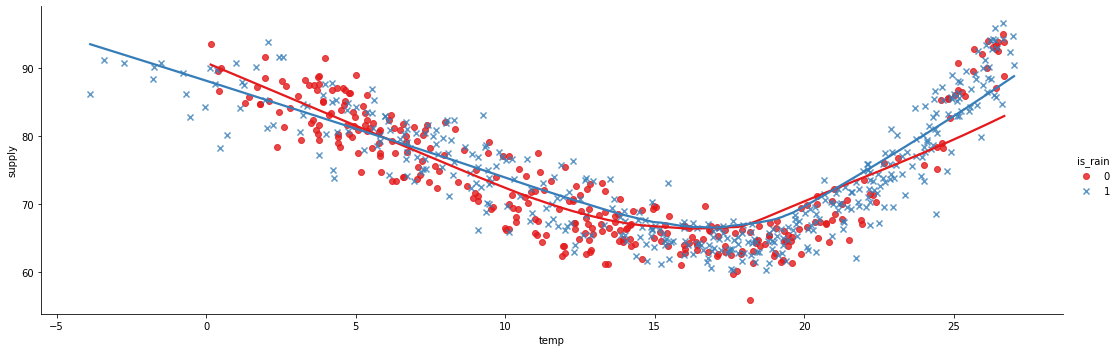

In [130]:
# temp vs. supply
sns.lmplot(x='temp', y='supply', hue='is_rain', data=smp_mean,aspect=3, lowess=True, markers=['o', 'x'], palette='Set1')

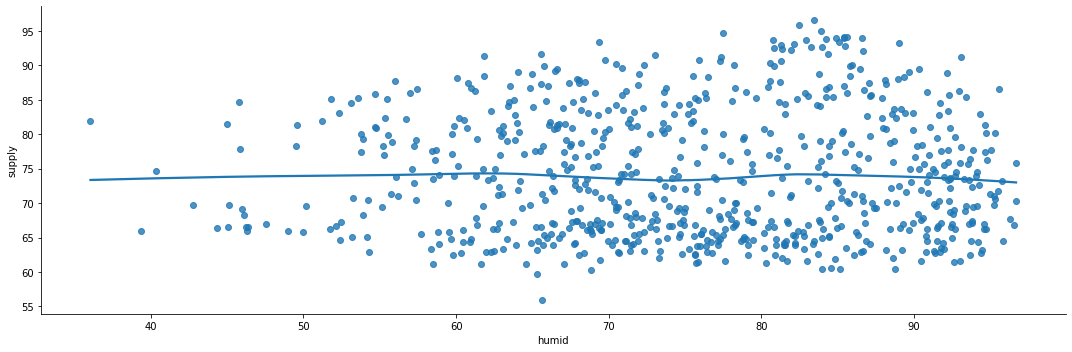

In [193]:
sns.lmplot(x='humid', y='supply', data=smp_mean,aspect=3, lowess=True)

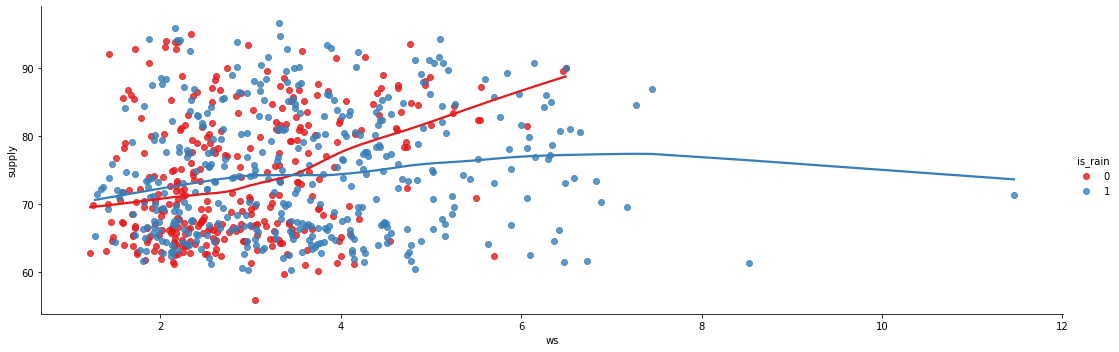

In [215]:
sns.lmplot(x='ws', y='supply', hue='is_rain', data=smp_mean,aspect=3, lowess=True, palette='Set1')

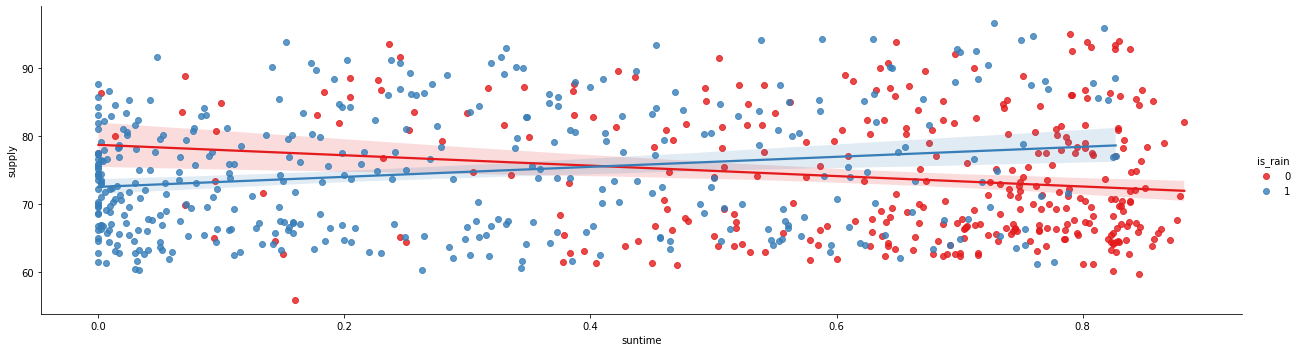

In [216]:
sns.lmplot(x='suntime', y='supply', hue='is_rain', data=smp_mean, aspect=3.5, palette='Set1')

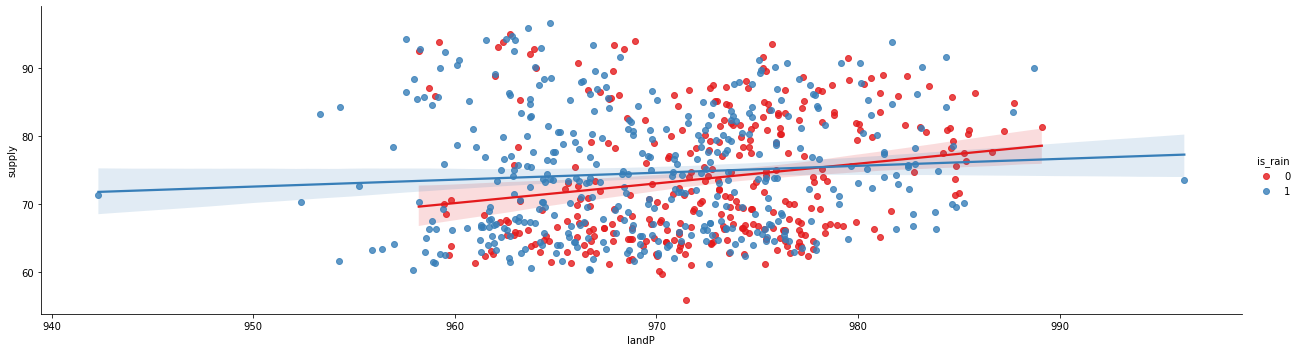

In [217]:
sns.lmplot(x='landP', y='supply', hue='is_rain', data=smp_mean, aspect=3.5, palette='Set1')

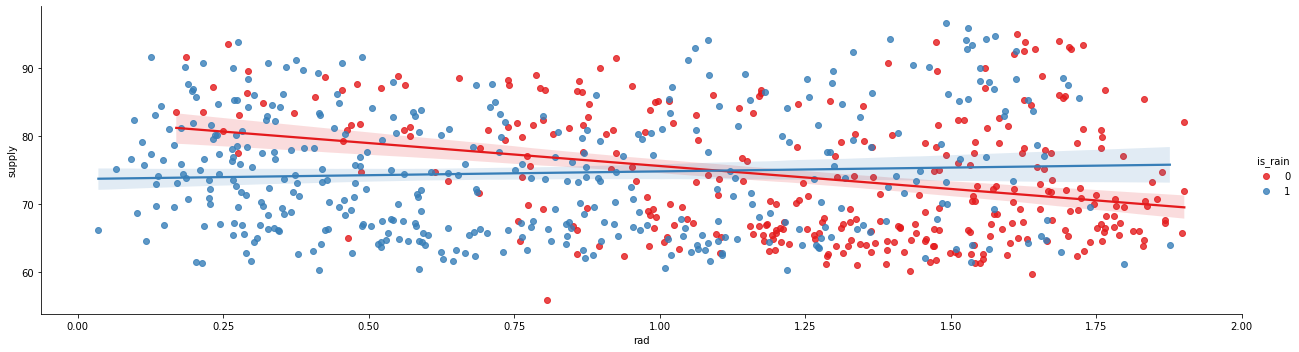

In [218]:
sns.lmplot(x='rad', y='supply', hue='is_rain', data=smp_mean, aspect=3.5, palette='Set1')

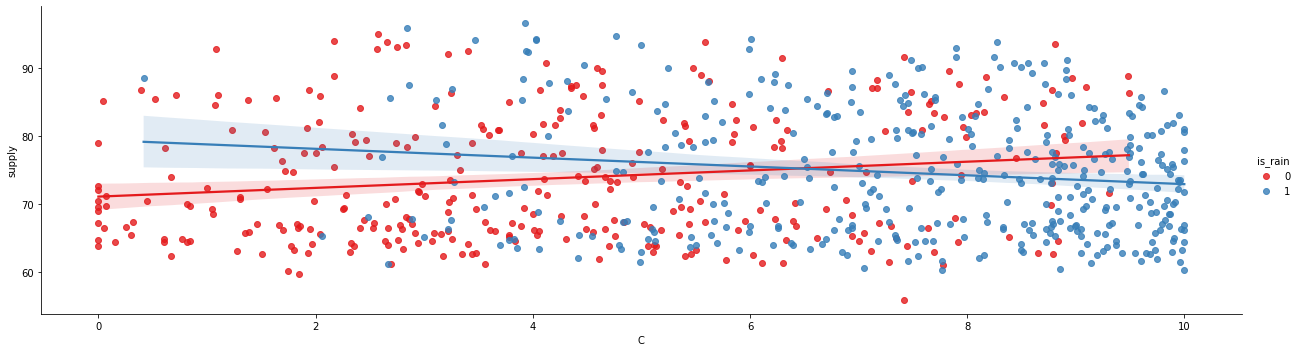

In [219]:
sns.lmplot(x='C', y='supply', hue='is_rain', data=smp_mean, aspect=3.5, palette='Set1')

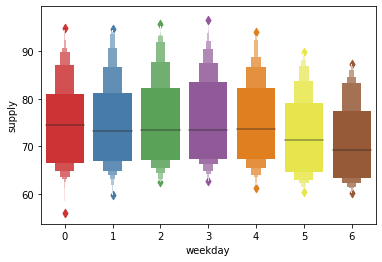

In [238]:
sns.boxenplot('weekday', 'supply', data=smp_mean, palette='Set1')

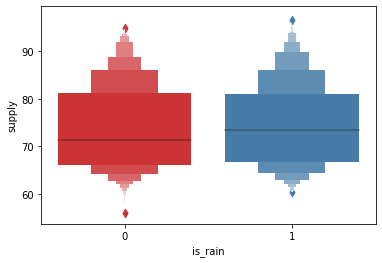

In [229]:
sns.boxenplot('is_rain', 'supply', data=smp_mean, palette='Set1')

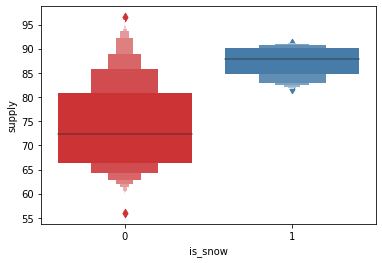

In [228]:
sns.boxenplot('is_snow', 'supply', data=smp_mean, palette='Set1')

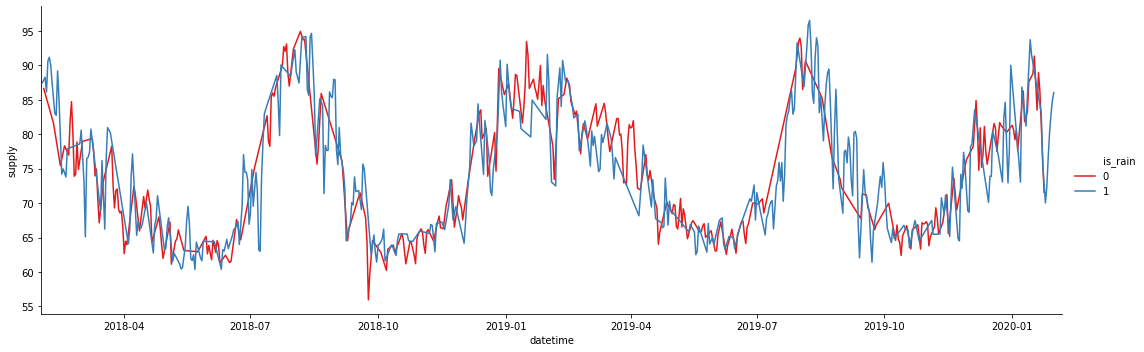

In [181]:
smp_mean['datetime'] = smp_mean.index
g = sns.relplot(x='datetime', y='supply', hue='is_rain', data=smp_mean, aspect=3, kind='line', palette='Set1')
g.set(xlim=(datetime.date(2018,1,31), datetime.date(2020,2,6)))

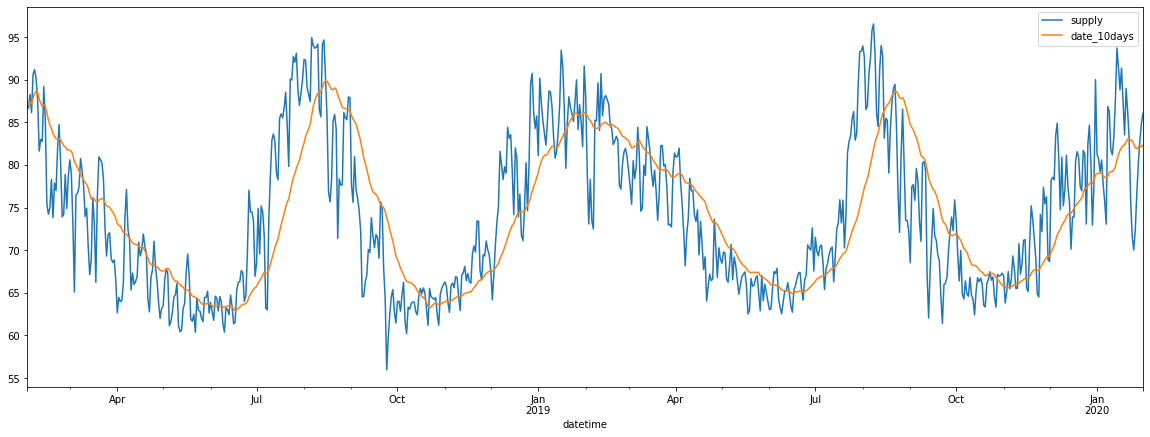

In [234]:
# rolling 10 days
smp_mean['date_14days']=smp_mean['supply'].rolling('14D').mean()
smp_mean[['supply', 'date_10days']].plot(subplots=False,figsize=(20,7))

# During the summer and winder, Supply is dramatically increased.